In [1]:
#Импортируем необходимые библиотеки для анализа.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Производим чтение локального файла.
df = pd.read_csv('2023_nba_player_stats.csv')
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [3]:
#Смотрим общую информацию о датасете.
print('Этот ДатаСет имеет', df.shape[0], 'строк и', df.shape[1], 'столбцов.')

Этот ДатаСет имеет 539 строк и 30 столбцов.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [7]:
df.describe(include = 'object')

,PName,POS,Team
count,539,534,539
unique,539,7,30
top,Jayson Tatum,SG,DAL
freq,1,96,21


In [37]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
Age,539.0,25.970315,4.315513,19.0,23.000000,25.0,29.000000,42.0
GP,539.0,48.040816,24.650686,1.0,30.500000,54.0,68.000000,83.0
W,539.0,24.018553,14.496366,0.0,12.000000,25.0,36.000000,57.0
L,539.0,24.022263,13.445866,0.0,14.000000,25.0,34.000000,60.0
Min,539.0,1103.617625,827.765114,1.0,329.000000,970.2,1845.900000,2963.2
PTS,539.0,523.426716,498.084360,0.0,120.500000,374.0,769.500000,2225.0
FGM,539.0,191.576994,178.351286,0.0,45.500000,138.0,283.500000,728.0
FGA,539.0,403.005566,369.595909,0.0,93.500000,300.0,598.500000,1559.0
FG%,539.0,46.325232,10.967271,0.0,41.650000,45.5,50.600000,100.0
3PM,539.0,56.324675,60.916821,0.0,5.000000,36.0,92.000000,301.0


Text(0, 0.5, 'Среднее количество блоков')

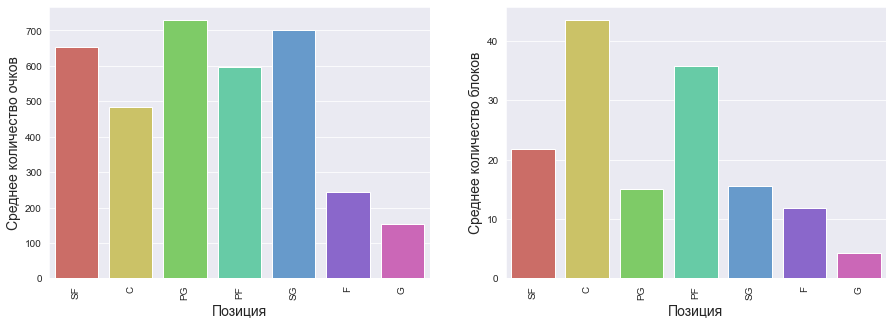

In [10]:
#Среднее колисество очков и соершенных блоков по позиции.
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.barplot(data=df, x='POS', y='PTS', ci = None, palette = 'hls')
sns.set_style('darkgrid')
plt.xticks(rotation = 90)
plt.xlabel('Позиция', fontsize=14)
plt.ylabel('Среднее количество очков', fontsize=14)


plt.subplot(1,2,2)
sns.set_style('darkgrid')
sns.barplot(data=df, x='POS', y='BLK', ci=None, palette = 'hls')
plt.xticks(rotation = 90)
plt.xlabel('Позиция', fontsize=14)
plt.ylabel('Среднее количество блоков', fontsize=14)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Количество блоков')

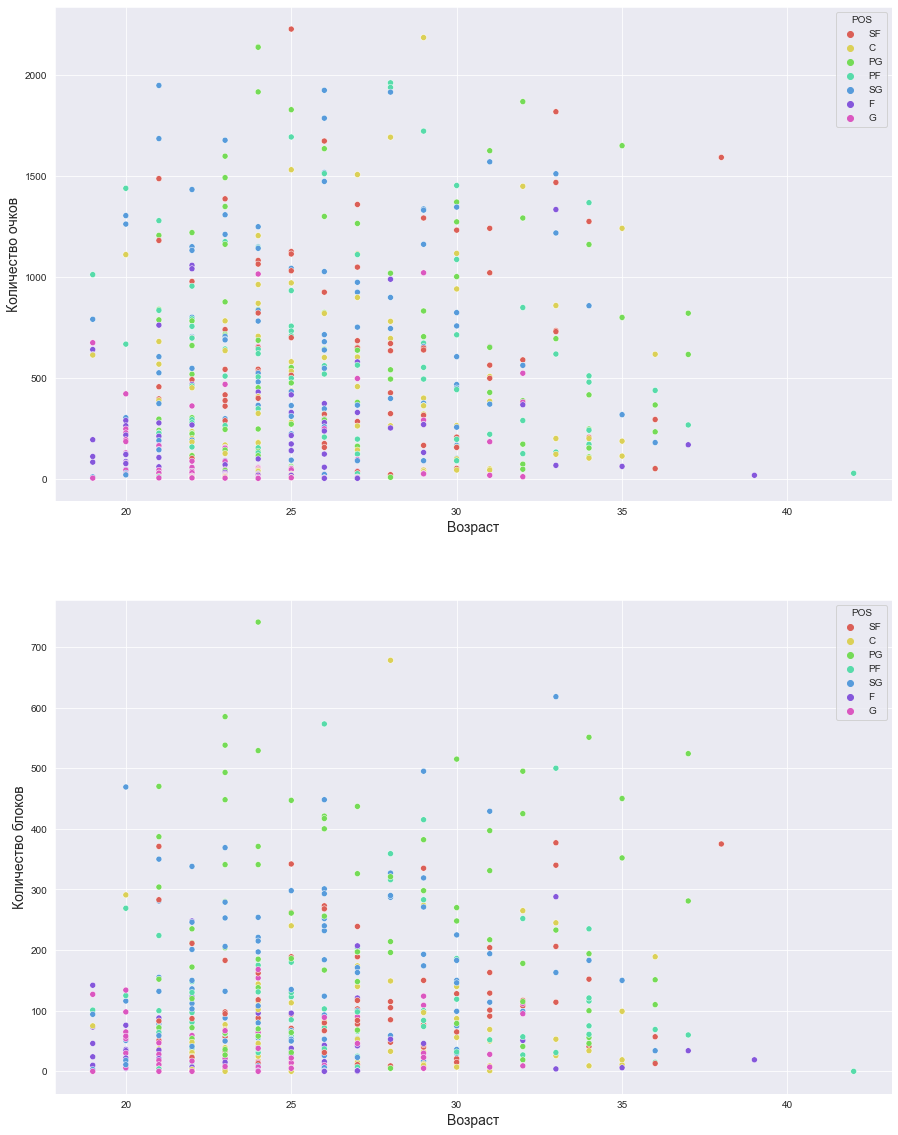

In [15]:
#Разбивка ассистов и очков по возрастам, разбивка по позициям.
plt.figure(figsize=(15, 20))
plt.legend(bbox_to_anchor=( 1.02 , 0.55 ), loc='upper left', borderaxespad= 0)

plt.subplot(2,1,1)
sns.scatterplot(data=df, x='Age', y='PTS', hue = 'POS', ci=None, palette = 'hls')
plt.xticks(rotation = 0)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество очков', fontsize=14)

plt.subplot(2,1,2)
sns.scatterplot(data=df, x='Age', y='AST', hue = 'POS', ci=None, palette = 'hls')
plt.xticks(rotation = 0)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество блоков', fontsize=14)

Text(0, 0.5, 'Сумма очков нападения (очки + ассисты)')

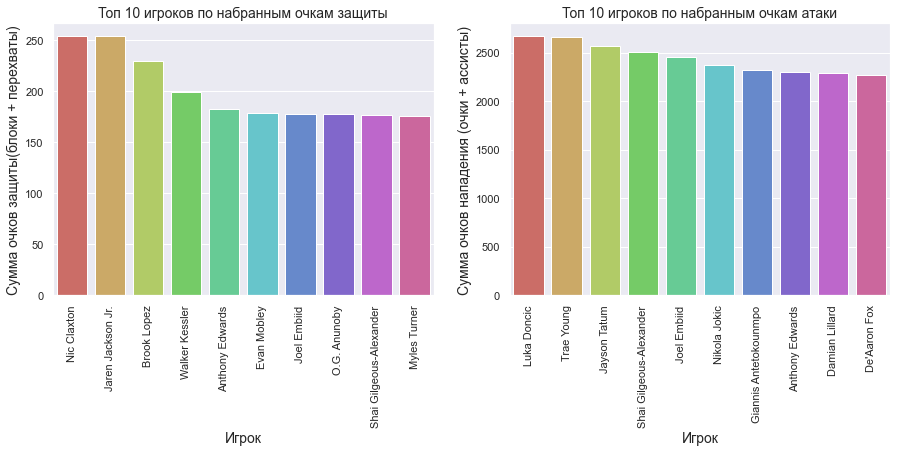

In [21]:
#Топ 10 игроков в атаке (очки + ассисты) и Топ 10 игроко в защите (блок + перехваты).

df['DEF'] = df['BLK'] + df['STL']
df['ATK'] = df['PTS'] + df['AST']
df2 = df[['PName','DEF']].sort_values(by = "DEF", ascending = False).head(10)
df3 = df[['PName','ATK']].sort_values(by = "ATK", ascending = False).head(10)

plt.figure(figsize=(15, 5))
sns.set (font_scale= 1 )

plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.barplot(data=df2, x='PName', y='DEF', ci=None, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Топ 10 игроков по набранным очкам защиты', fontsize=14)
plt.xlabel('Игрок', fontsize=14)
plt.ylabel('Сумма очков защиты(блоки + перехваты)', fontsize=14)

plt.subplot(1,2,2)
sns.set_style('darkgrid')
sns.barplot(data=df3, x='PName', y='ATK', ci=None, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Топ 10 игроков по набранным очкам атаки', fontsize=14)
plt.xlabel('Игрок', fontsize=14)
plt.ylabel('Сумма очков нападения (очки + ассисты)', fontsize=14)

Text(0, 0.5, 'Количество набранных очков')

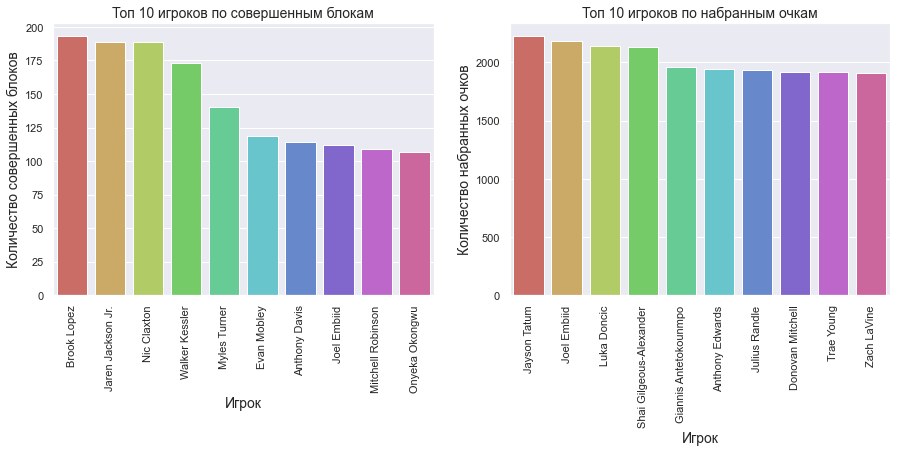

In [20]:
#Топ 10 игроков по очкам и Топ 10 игроков по блокам.

df_block = df[['PName','BLK']].sort_values(by = "BLK", ascending = False).head(10)
df_point = df[['PName','PTS']].sort_values(by = "PTS", ascending = False).head(10)

plt.figure(figsize=(15, 5))
sns.set (font_scale= 1 )

plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.barplot(data=df_block, x='PName', y='BLK', ci=None, palette = 'hls')
plt.title('Топ 10 игроков по совершенным блокам', fontsize=14)
plt.xticks(rotation = 90)
plt.xlabel('Игрок', fontsize=14)
plt.ylabel('Количество совершенных блоков', fontsize=14)

plt.subplot(1,2,2)
sns.set_style('darkgrid')
sns.barplot(data=df_point, x='PName', y='PTS', ci=None, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Топ 10 игроков по набранным очкам', fontsize=14)
plt.xlabel('Игрок', fontsize=14)
plt.ylabel('Количество набранных очков', fontsize=14)

Text(0, 0.5, 'Среднее количество сыгранных минут')

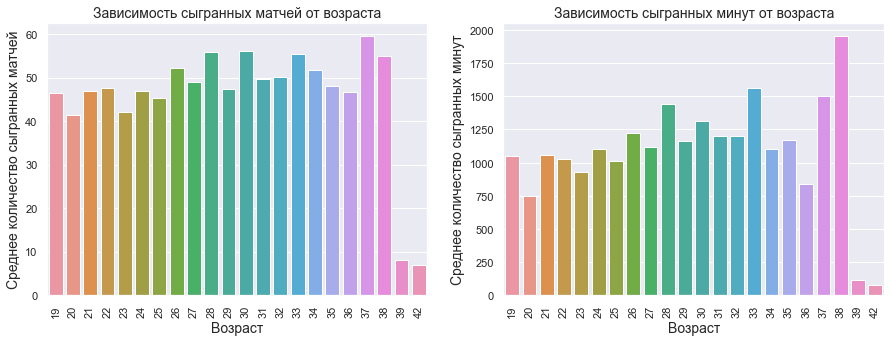

In [25]:
#Зависимость сыгранных игр от возраста и время проведенных минут.
plt.figure(figsize=(15, 5))


plt.subplot(1,2,1)
sns.barplot(data=df, x='Age', y='GP', ci=None)
plt.xticks(rotation = 90)
plt.title('Зависимость сыгранных матчей от возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Среднее количество сыгранных матчей', fontsize=14)

plt.subplot(1,2,2)
sns.barplot(data=df, x='Age', y='Min', ci=None)
plt.xticks(rotation = 90)
plt.title('Зависимость сыгранных минут от возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Среднее количество сыгранных минут', fontsize=14)

Text(0, 0.5, 'Average Points on Team')

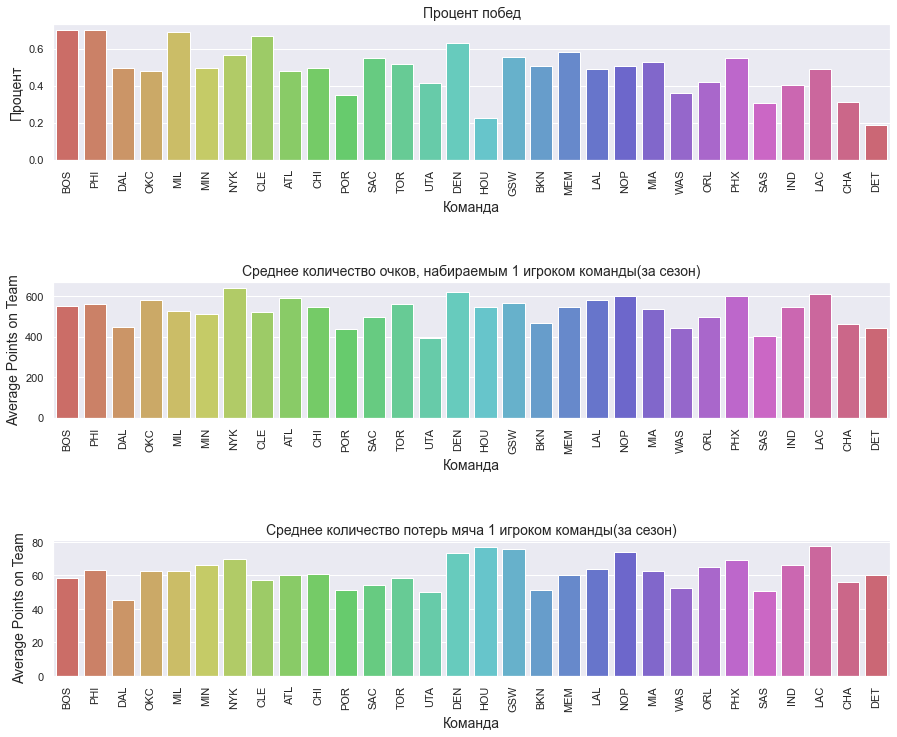

In [28]:
#Наибольший процент побед среди команд
df['W%'] = df['W']/df['GP']
df4 = df[["Team", 'W%']]
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.9)

plt.subplot(3,1,1)
sns.set_style('darkgrid')
sns.barplot(data=df4, x='Team', y='W%', ci=None, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Процент побед', fontsize=14)
plt.xlabel('Команда', fontsize=14)
plt.ylabel('Процент', fontsize=14)

#Среднее количество очков, набираемым 1 игроком команды(за сезон)
plt.subplot(3,1,2)
sns.set_style('darkgrid')
sns.barplot(data=df, x='Team', y='PTS', ci=None, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Среднее количество очков, набираемым 1 игроком команды(за сезон)', fontsize=14)
plt.xlabel('Команда', fontsize=14)
plt.ylabel('Average Points on Team', fontsize=14)


#Среднее количество потерь мяча 1 игроком команды(за сезон)
plt.subplot(3,1,3)
sns.set_style('darkgrid')
sns.barplot(data=df, x='Team', y='TOV', ci=None, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Среднее количество потерь мяча 1 игроком команды(за сезон)', fontsize=14)
plt.xlabel('Команда', fontsize=14)
plt.ylabel('Average Points on Team', fontsize=14)

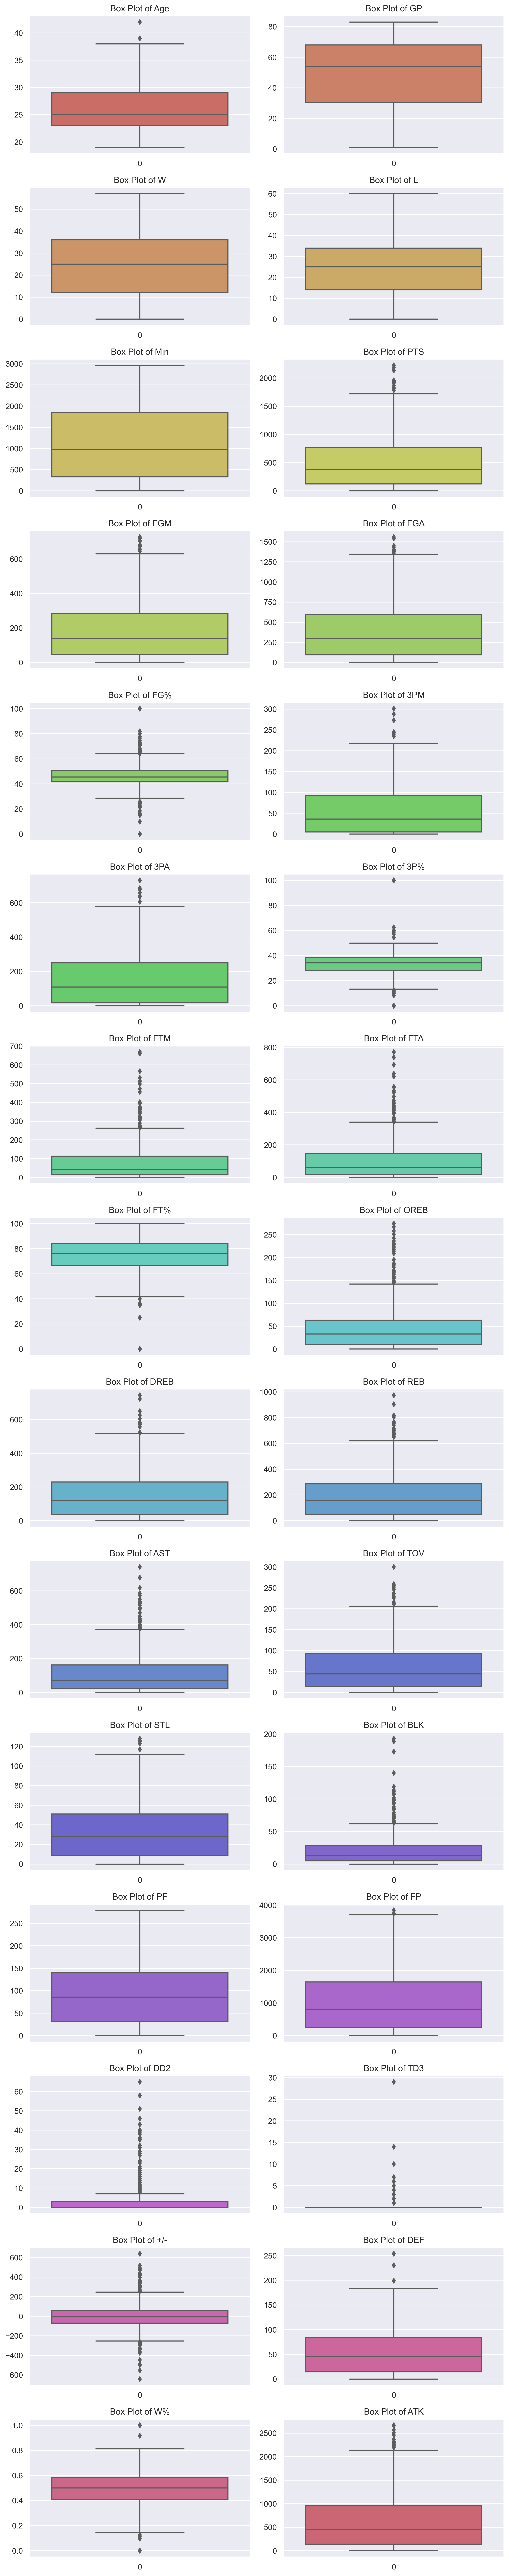

In [39]:
column_to_exclude = ['PName', 'POS', 'Team']

all_columns = df.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 50),dpi = 300)

colors = sns.color_palette("hls", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()